In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Flatten, Dense, Dropout
)
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

In [2]:
DATA_DIR = "/Users/julie/Desktop/CareerFoundry/3.1./Data/Weather Images"

In [3]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

Found 901 images belonging to 4 classes.


In [11]:
val_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

Found 224 images belonging to 4 classes.


In [12]:
print(train_data.class_indices)


{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}


In [ ]:
#build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])


In [14]:
# compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# train model
history = model.fit(
    train_data,
    epochs=15,
    validation_data=val_data,
    verbose=1
)


Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.6271 - loss: 0.8293 - val_accuracy: 0.7411 - val_loss: 1.0171
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.7869 - loss: 0.5824 - val_accuracy: 0.7946 - val_loss: 0.6017
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.8879 - loss: 0.3898 - val_accuracy: 0.7589 - val_loss: 0.7452
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.8946 - loss: 0.3139 - val_accuracy: 0.7991 - val_loss: 0.6076
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9134 - loss: 0.2695 - val_accuracy: 0.8482 - val_loss: 0.3902
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8957 - loss: 0.3418 - val_accuracy: 0.7411 - val_loss: 0.8073
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9256 - loss: 0.2172 - val_accuracy: 0.8527 - val_loss: 0.4225
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9412 - loss: 0.1860 - val_accuracy: 0.

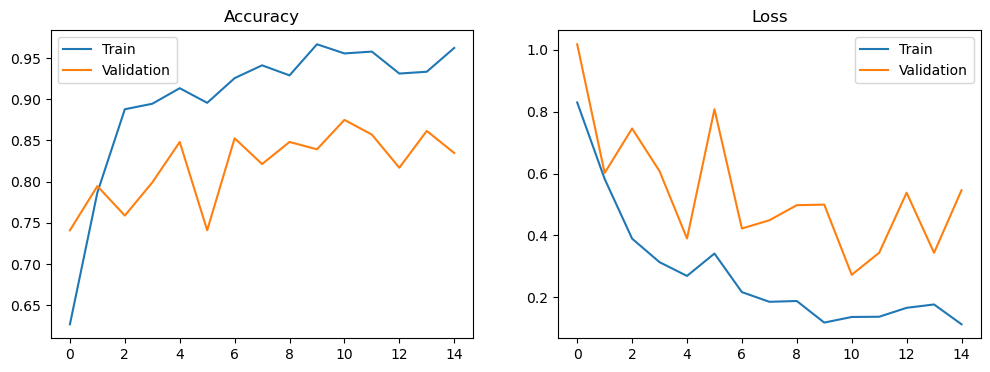

In [16]:
# accuracy loss plot
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.legend()

plt.show()


In [17]:
val_loss, val_acc = model.evaluate(val_data, verbose=0)
print(f"Validation accuracy: {val_acc*100:.1f}%")
print(f"Validation loss: {val_loss:.3f}")


Validation accuracy: 83.5%
Validation loss: 0.546


### Confussion Matrix

In [21]:
# Get true labels
y_true = val_data.classes

# Predict class probabilities
y_pred_probs = model.predict(val_data)

# Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


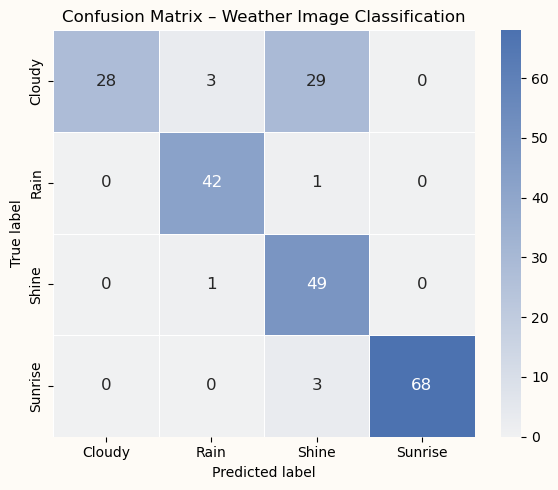

In [33]:
# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(6, 5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=sns.light_palette("#4C72B0", as_cmap=True),
    cbar=True,
    linewidths=0.5,
    linecolor="white",
    xticklabels=class_names,
    yticklabels=class_names,
    annot_kws={"size": 12}
)

# Background colors
plt.gca().set_facecolor("#FEFBF6")
plt.gcf().patch.set_facecolor("#FEFBF6")

# Labels and title
plt.title("Confusion Matrix – Weather Image Classification")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()